In [1]:
from tqdm import tqdm
from os import path
import sys
from functools import partial

## Local Imports ##
if '../' not in sys.path:
    sys.path.insert(0, '../')
from datasets import helpers as dataset_helpers

## Dataset

In [2]:
HOME = path.expanduser('~')
ROOT_DIR = path.join(
    path.abspath('..'),
    'data'
)
DT_LEN = 20000
W, H = 128, 128

DATASETS = [
    {
        "root_dir": path.join(ROOT_DIR, f"{W}x{H}", "polygon_RGB_counts"),
        "skip": True,
        "gen_example_fn": partial(
            dataset_helpers.gen_random_color_example, 
            draw_polygon_fns=[
                dataset_helpers.draw_rectangle,
                dataset_helpers.draw_ellipse
            ],
            max_polygons=6,
            min_polygons=3,
            count=True
        )
    },
    {
        "root_dir": path.join(ROOT_DIR, f"{W}x{H}", "polygon_rgb_noised_counts"),
        "skip": True,
        "gen_example_fn": partial(
            dataset_helpers.gen_random_color_noised_example,
            draw_polygon_fns=[
                dataset_helpers.draw_rectangle,
                dataset_helpers.draw_ellipse
            ],
            min_polygons=5,
            max_polygons=10,
            count=True
        )
    },
    {
        "root_dir": path.join(ROOT_DIR, "polygon_data_counts"),
        "skip": True,
        "gen_example_fn": partial(
            dataset_helpers.gen_binary_example,
            count=True,
            draw_polygon_fn=dataset_helpers.draw_random_rectangle
        )
    },
    {
        "root_dir": path.join(ROOT_DIR, "polygon_data_percentage"),
        "skip": True,
        "gen_example_fn": partial(
            dataset_helpers.gen_binary_example,
            count=False,
            draw_polygon_fn=dataset_helpers.draw_random_rectangle
        )
    },
    {
        "root_dir": path.join(ROOT_DIR, "ellipse_data_counts"),
        "skip": True,
        "gen_example_fn": partial(
            dataset_helpers.gen_binary_example,
            count=False,
            draw_polygon_fn=dataset_helpers.draw_random_ellipse
        ),
    },
    {
        "root_dir": path.join(ROOT_DIR, "ellipse_data_percentage"),
        "skip": True,
        "gen_example_fn": partial(
            dataset_helpers.gen_binary_example, 
            count=False,
            draw_polygon_fn=dataset_helpers.draw_random_ellipse
        ),
    }
]

for dataset in tqdm(DATASETS):
    df_train = dataset_helpers.gen_df(
        dt_len=DT_LEN, test=False, img_size=(W, H), **dataset
    )
    df_test = dataset_helpers.gen_df(
        dt_len=int(DT_LEN * 0.8), test=True, img_size=(W, H), **dataset
    )
print("DONE!")

  0%|          | 0/6 [00:00<?, ?it/s]

Found existing dataset, skipping for /home/victor/Git/areacnn/data/128x128/polygon_RGB_counts/train...
Found existing dataset, skipping for /home/victor/Git/areacnn/data/128x128/polygon_RGB_counts/test...
Created directory /home/victor/Git/areacnn/data/128x128/polygon_rgb_noised_counts/test
Created directory /home/victor/Git/areacnn/data/128x128/polygon_rgb_noised_counts/test/images


100%|██████████| 6/6 [02:32<00:00, 25.48s/it]

Found existing dataset, skipping for /home/victor/Git/areacnn/data/polygon_data_counts/train...
Found existing dataset, skipping for /home/victor/Git/areacnn/data/polygon_data_counts/test...
Found existing dataset, skipping for /home/victor/Git/areacnn/data/polygon_data_percentage/train...
Found existing dataset, skipping for /home/victor/Git/areacnn/data/polygon_data_percentage/test...
Found existing dataset, skipping for /home/victor/Git/areacnn/data/ellipse_data_counts/train...
Found existing dataset, skipping for /home/victor/Git/areacnn/data/ellipse_data_counts/test...
Found existing dataset, skipping for /home/victor/Git/areacnn/data/ellipse_data_percentage/train...
Found existing dataset, skipping for /home/victor/Git/areacnn/data/ellipse_data_percentage/test...
DONE!


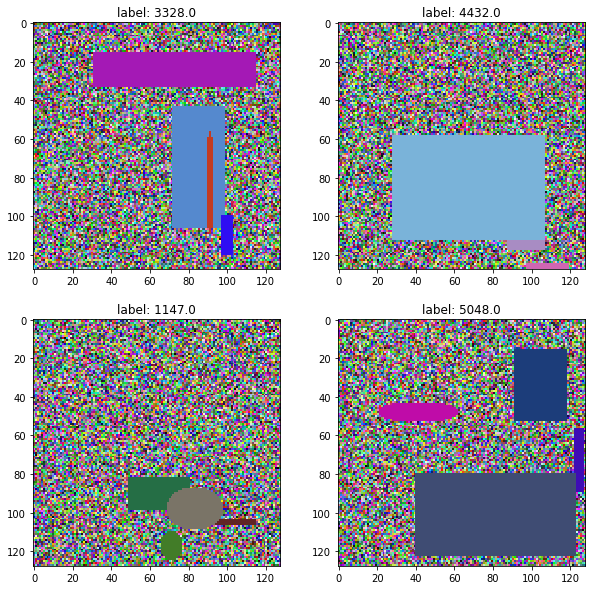

In [10]:
from matplotlib import pyplot as plt
f, axarrs = plt.subplots(2, 2, figsize=(10, 10))
for axh in axarrs:
    for ax in axh:
        im, area = dataset_helpers.gen_random_color_noised_example(
            128, 
            128,
            draw_polygon_fns=[
                dataset_helpers.draw_rectangle,
                dataset_helpers.draw_ellipse
            ],
            max_polygons=6,
            min_polygons=3,
            count=True
        )
        ax.set_title(f"label: {area}")
        ax.imshow(im)
plt.show()